In [68]:
%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pyplot as plt

### Load Data

In [44]:
df = pd.read_csv('PrimarySchoolsPerfomanceAndLocation-2014.csv')
df.shape

(15866, 13)

In [45]:
df.columns

Index([u'CODE', u'NAME', u'REGION', u'DISTRICT', u'WARD', u'OWNERSHIP',
       u'LONGITUDE', u'LATITUDE', u'PASS_RATE', u'AVG_MARK',
       u'CHANGE_PREVIOUS_YEAR', u'RANK', u'YEAR_OF_RESULT'],
      dtype='object')

In [46]:
col =['NAME','REGION','DISTRICT','OWNERSHIP','PASS_RATE','AVG_MARK','CHANGE_PREVIOUS_YEAR','RANK']
for c in df.columns:
    if c not in col:
        df=df.drop(c,axis=1)

In [47]:
df.shape

(15866, 8)

In [48]:
df.OWNERSHIP.unique()

array(['GOVERNMENT', nan, 'NON GOVERNMENT'], dtype=object)

In [54]:
df.head(10)

,NAME,REGION,DISTRICT,OWNERSHIP,PASS_RATE,AVG_MARK,CHANGE_PREVIOUS_YEAR,RANK
0,BANGATA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,51.52,99.29,13.05,9426
1,BWAWANI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,26.83,85.78,8.42,13056
2,EKENYWA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,65.31,108.33,7.18,6842
3,EMAOI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100.00,135.09,25.83,2296
4,ENDONYOESOIYE PR. SCHOOL,ARUSHA,ARUSHA,NaN,43.84,96.10,11.51,10363
5,ENGALAONI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,88.10,120.17,30.46,4220
6,ENGORIKA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,42.86,100.10,5.98,9195
7,ENGUTUKOITI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,4.76,70.10,-25.99,15425
8,ENYUATA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,86.55,131.43,11.22,2666
9,GREEN ACRES PR. SCHOOL,ARUSHA,ARUSHA,NON GOVERNMENT,100.00,200.03,8.15,84


### We need to know number of primary school which did standard seven exam year 2015

In [61]:
df.shape[0]

15866

##### There about 15866 schools 

#### Ownership of the School 
can be seen below schools are grouped either Government or Non Government schools and there are about 2833 schools which have no type

In [62]:
print df.OWNERSHIP.unique()

['GOVERNMENT' nan 'NON GOVERNMENT']


how many do not have type or they are empty?

In [60]:
df[df.OWNERSHIP.isnull()].shape[0]

2833

Sample of school which ownership is empty

In [55]:
df[df.OWNERSHIP.isnull()].head(10)

,NAME,REGION,DISTRICT,OWNERSHIP,PASS_RATE,AVG_MARK,CHANGE_PREVIOUS_YEAR,RANK
4,ENDONYOESOIYE PR. SCHOOL,ARUSHA,ARUSHA,NaN,43.84,96.10,11.51,10363
18,KAMBI YA MAZIWA PR. SCHOOL,ARUSHA,ARUSHA,NaN,86.67,122.29,-0.13,3875
67,OLDONYOSAPUK PR. SCHOOL,ARUSHA,ARUSHA,NaN,98.73,160.06,66.59,744
86,THEMI YA SIMBA PR. SCHOOL,ARUSHA,ARUSHA,NaN,44.44,95.61,26.11,10496
94,SOTWA WILSON PR. SCHOOL,ARUSHA,ARUSHA,NaN,100.00,120.75,3.32,4118
98,ASSALAF ISLAMIC PR. SCHOOL,ARUSHA,ARUSHA,NaN,100.00,162.83,0.94,673
104,ARUSHA HILL SIDE,ARUSHA,ARUSHA,NaN,28.57,93.57,0.00,11085
105,EBENEZER,ARUSHA,ARUSHA,NaN,100.00,159.29,0.00,774
106,EUNOTO,ARUSHA,ARUSHA,NaN,72.41,118.93,0.00,4490
107,ILKONERE,ARUSHA,ARUSHA,NaN,68.75,107.90,0.00,6953


####  Those which ownership is not null, either Government or Non Government

In [64]:
df[df.OWNERSHIP.notnull()].head(10)

,NAME,REGION,DISTRICT,OWNERSHIP,PASS_RATE,AVG_MARK,CHANGE_PREVIOUS_YEAR,RANK
0,BANGATA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,51.52,99.29,13.05,9426
1,BWAWANI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,26.83,85.78,8.42,13056
2,EKENYWA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,65.31,108.33,7.18,6842
3,EMAOI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,100.00,135.09,25.83,2296
5,ENGALAONI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,88.10,120.17,30.46,4220
6,ENGORIKA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,42.86,100.10,5.98,9195
7,ENGUTUKOITI PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,4.76,70.10,-25.99,15425
8,ENYUATA PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,86.55,131.43,11.22,2666
9,GREEN ACRES PR. SCHOOL,ARUSHA,ARUSHA,NON GOVERNMENT,100.00,200.03,8.15,84
10,ILBORU PR. SCHOOL,ARUSHA,ARUSHA,GOVERNMENT,93.94,131.69,6.17,2641


and they are 13033

In [67]:
df[df.OWNERSHIP.notnull()].shape[0]

13033

Lets plot a pie chat to visualize the data

In [77]:
government_schools =sum(df.OWNERSHIP=='GOVERNMENT') #Government schools
nongovernment_schools =sum(df.OWNERSHIP=='NON GOVERNMENT') #nongovernment schools
unknown = sum(df.OWNERSHIP.isnull()) #number of shools with unknown ownership
schl=df.shape[0] #number of schools


15866


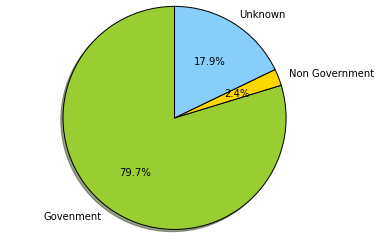

In [89]:
Labels =['Govenment', 'Non Government','Unknown']
fractions =[float(government_schools)/schl, float(nongovernment_schools)/schl, float(unknown)/schl] #percentage
colors = ['yellowgreen', 'gold', 'lightskyblue'] #colors for pie chart
explode = (0, 0, 0) #only explode the first slice

plt.pie(fractions, explode=explode, labels=Labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [ ]:
df[['PASS_RATE','AVG_MARK','CHANGE_PREVIOUS_YEAR']]